# A test model made differently to the main model
I did this to try and see whether the problem was with my model or with my code on the server. I still get the same problem when using a model made by this network however so the problem must be on the server

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as kr
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:

(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = kr.datasets.mnist.load_data()

train_img = train_img.reshape(60000, 784)
train_img = train_img.astype('float32')
train_img= train_img/255
test_img = test_img.reshape(10000, 784)

test_img= test_img/255

test_img = test_img.astype('float32')

total_Digits= 10
# convert the labels to one hot vectors 
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, total_Digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, total_Digits)

print("One hot vector at index 5 ", train_lbl[4])

One hot vector at index 5  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Value of training label at index 0: 5
One hot Vector of training label at index 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


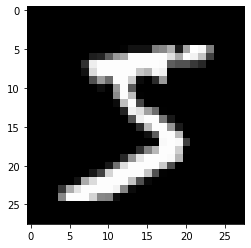

In [18]:
# displaying the training images and labels
image= train_img[0]

plt.imshow(image.reshape(28,28), cmap="gray")
print("Value of training label at index 0:", train_labels[0])
print("One hot Vector of training label at index 0:", train_lbl[0])

In [16]:

model = kr.models.Sequential()

#this layer gets inputs

model.add(kr.layers.Dense(600, activation='relu', input_shape=(784,)))

model.add(kr.layers.Dense(400, activation="relu"))

model.add(kr.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.fit(inputs, outputs, epochs=1, batch_size=256, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 9s 147us/step - loss: 0.2645 - accuracy: 0.9246


In [13]:
loss, accuracy = model.evaluate(test_img, test_lbl)
score = model.evaluate(test_img, test_lbl)
print(loss, accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 1s 129us/step
0.08388623963911482 0.980400025844574
accuracy: 98.04%


[[1.0453385e-09 1.2258569e-10 6.0631827e-10 1.8120566e-12 9.9873573e-01
  3.2140186e-11 5.8699100e-12 1.6531230e-07 6.1696803e-10 1.2641629e-03]]
4


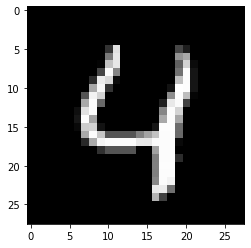

In [12]:
image= test_img[4]
plt.imshow(image.reshape(28,28),cmap="gray")

print(model.predict(test_img[4:5]))

print(np.argmax(model.predict(test_img[4:5])))

In [11]:
model.save("testmodel.h5")